center of the cap:  284 388
diameter:  1602.2122533307945
The liner is not missing
The liner is complete
center of the liner:  284 390
diameter:  1162.3892818282234


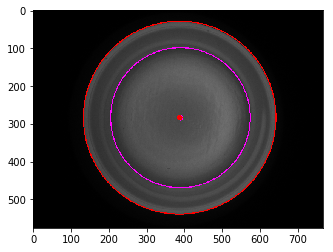

center of the cap:  288 384
diameter:  1595.929068023615
The liner is not missing
The liner is complete
center of the liner:  286 384
diameter:  1168.672467135403


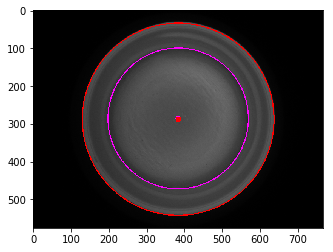

center of the cap:  290 382
diameter:  1595.929068023615
The liner is not missing
The liner is complete
center of the liner:  290 380
diameter:  1168.672467135403


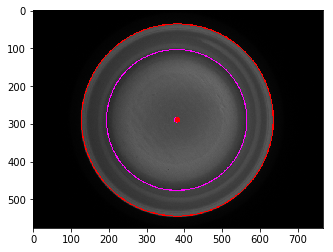

center of the cap:  290 386
diameter:  1595.929068023615
The liner is not missing
The liner is complete
center of the liner:  292 388
diameter:  1168.672467135403


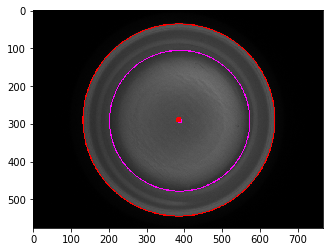

center of the cap:  288 390
diameter:  1608.495438637974
The liner is not missing
The liner is complete
center of the liner:  286 392
diameter:  1156.1060965210438


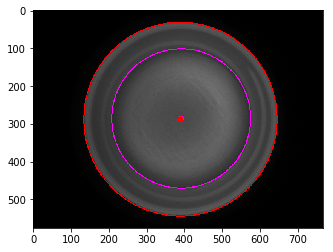

center of the cap:  288 382
diameter:  1602.2122533307945
The liner is not missing
The liner is complete
center of the liner:  288 386
diameter:  1162.3892818282234


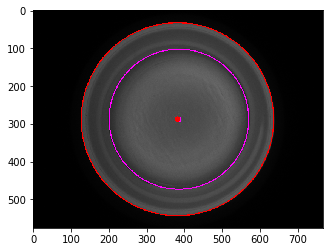

center of the cap:  292 386
diameter:  1595.929068023615
The liner is not missing
The liner is complete
center of the liner:  288 384
diameter:  1162.3892818282234


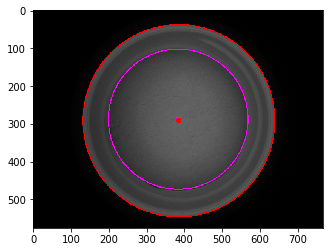

center of the cap:  284 386
diameter:  1595.929068023615
The liner is not missing
The liner is incomplete
center of the liner:  280 388
diameter:  1187.5220230569419


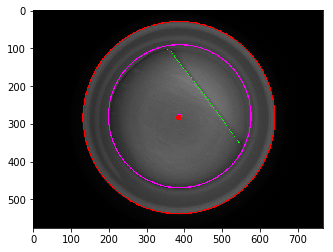

center of the cap:  288 384
diameter:  1602.2122533307945
The liner is not missing
The liner is incomplete
center of the liner:  284 384
diameter:  1187.5220230569419


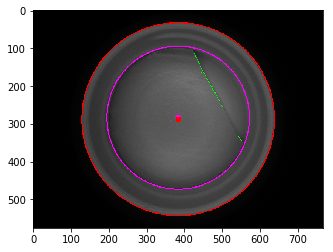

center of the cap:  288 382
diameter:  1602.2122533307945
The liner is not missing
The liner is incomplete
center of the liner:  286 382
diameter:  1156.1060965210438


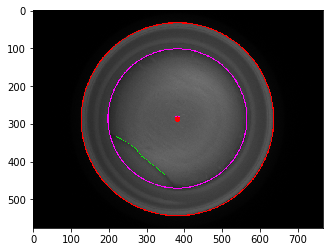

center of the cap:  290 384
diameter:  1595.929068023615
The liner is not missing
The liner is incomplete
center of the liner:  294 386
diameter:  1168.672467135403


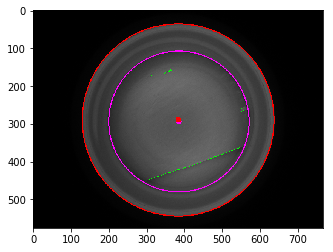

center of the cap:  284 388
diameter:  1595.929068023615
The liner is not missing
The liner is complete
center of the liner:  286 386
diameter:  1162.3892818282234


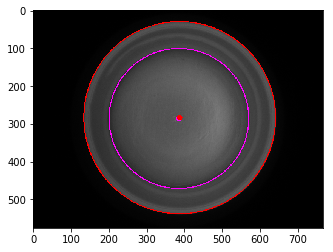

center of the cap:  288 380
diameter:  1589.6458827164354
The liner is not missing
The liner is complete
center of the liner:  286 382
diameter:  1156.1060965210438


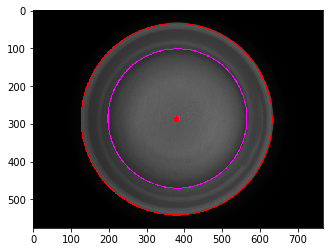

center of the cap:  288 382
diameter:  1595.929068023615
The liner is not missing
The liner is complete
center of the liner:  290 386
diameter:  1162.3892818282234


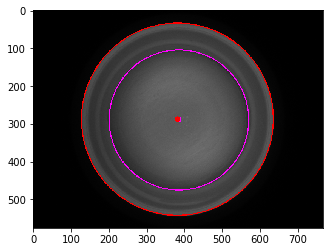

center of the cap:  282 384
diameter:  1595.929068023615
The liner is not missing
The liner is complete
center of the liner:  284 384
diameter:  1162.3892818282234


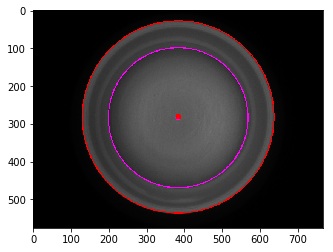

center of the cap:  288 378
diameter:  1595.929068023615
The liner is missing


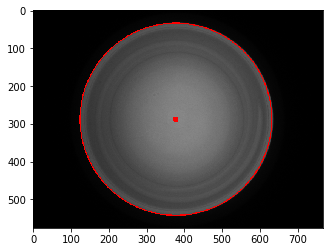

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def cap_control(img):
    g_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    
    # find the border of the cap
    circles = cv2.HoughCircles(g_img,cv2.HOUGH_GRADIENT,1,20,param1=150,param2=90,minRadius=150,maxRadius=300)
    if circles is not None:
        circles = np.uint16(np.around(circles))

    cap_c = circles[0][0]
    
    print('center of the cap: ',cap_c[1],cap_c[0])
    print('diameter: ',2*np.pi*cap_c[2])

    # calculate the mean of the lightness
    img1 = img[cap_c[1]-cap_c[2]+75:cap_c[1]+cap_c[2]-75,cap_c[0]-cap_c[2]+75:cap_c[0]+cap_c[2]-75]
    m1 = np.mean(img1)
    
    if m1 > 85:
        print('The liner is missing')
    else:
        print('The liner is not missing')
        
        # find the border of the liner
        circles = cv2.HoughCircles(g_img,cv2.HOUGH_GRADIENT,1,25,param1=45,param2=60,minRadius=150,maxRadius=210)
        if circles is not None:
            circles = np.uint16(np.around(circles))
        
        liner_c = circles[0][0]
        
        # compute a circular mask for the cap
        h,w = img.shape[:2]
        Y, X = np.ogrid[:h, :w]
        dist_from_center = np.sqrt((X - liner_c[0])**2 + (Y-liner_c[1])**2)
        mask = dist_from_center <= (liner_c[2]-10)
        
        # find the edges in the image
        edges = cv2.Canny(img,40,80)
        edges = np.bitwise_and(edges,mask)
        
        count=np.sum(edges)
        
        if count > 150:
            print('The liner is incomplete')
            edges = edges > 0
            img[edges,:] = (0,255,0)
        else:
            print('The liner is complete')
        
        # draw the liner border
        cv2.circle(img,(liner_c[0],liner_c[1]),liner_c[2],(255,0,255),2)
        cv2.circle(img,(liner_c[0],liner_c[1]),2,(255,0,255),10)
        
        print('center of the liner: ',liner_c[1],liner_c[0])
        print('diameter: ',2*np.pi*liner_c[2])
        
    # draw the cap border
    cv2.circle(img,(cap_c[0],cap_c[1]),cap_c[2],(255,0,0),2)
    cv2.circle(img,(cap_c[0],cap_c[1]),2,(255,0,0),10)
    
    plt.imshow(img)
    plt.show()
    

g1 = cv2.imread('images1/g_01.bmp')
g2 = cv2.imread('images1/g_02.bmp')
g3 = cv2.imread('images1/g_03.bmp')
g4 = cv2.imread('images1/g_04.bmp')
g5 = cv2.imread('images1/g_05.bmp')
g6 = cv2.imread('images1/g_06.bmp')
d1 = cv2.imread('images1/d_16.bmp')
d2 = cv2.imread('images1/d_17.bmp')
d3 = cv2.imread('images1/d_18.bmp')
d4 = cv2.imread('images1/d_19.bmp')
d5 = cv2.imread('images1/d_20.bmp')
d6 = cv2.imread('images1/d_21.bmp')
d7 = cv2.imread('images1/d_22.bmp')
d8 = cv2.imread('images1/d_23.bmp')
d9 = cv2.imread('images1/d_24.bmp')
d10 = cv2.imread('images1/d_31.bmp')


cap_control(g1)
cap_control(g2)
cap_control(g3)
cap_control(g4)
cap_control(g5)
cap_control(g6)
cap_control(d1)
cap_control(d2)
cap_control(d3)
cap_control(d4)
cap_control(d5)
cap_control(d6)
cap_control(d7)
cap_control(d8)
cap_control(d9)
cap_control(d10)

